<a href="https://colab.research.google.com/github/jhnsnlim/aseng_api/blob/master/ICBP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote
df = web.DataReader('ICBP.JK', data_source='yahoo', start='2015-01-01', end='2020-05-29')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,6687.5,6550.0,6550.0,6575.0,4689400.0,5705.682617
2015-01-05,6600.0,6300.0,6550.0,6575.0,6032400.0,5705.682617
2015-01-06,6462.5,6375.0,6450.0,6425.0,4246400.0,5575.516113
2015-01-07,6525.0,6437.5,6437.5,6500.0,1932800.0,5640.599609
2015-01-08,6550.0,6450.0,6450.0,6500.0,3289000.0,5640.599609
...,...,...,...,...,...,...
2020-05-20,9900.0,9350.0,9800.0,9600.0,11973600.0,9600.000000
2020-05-26,9600.0,8950.0,9600.0,8950.0,10324600.0,8950.000000
2020-05-27,8700.0,8325.0,8700.0,8325.0,13319000.0,8325.000000


In [4]:
#Get the number of rows & columns
df.shape

(1364, 6)

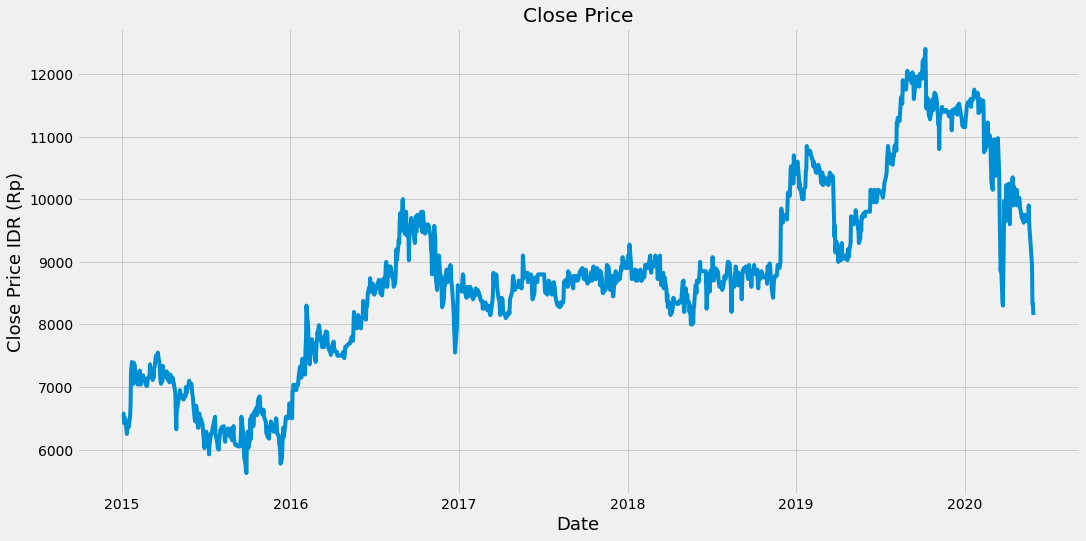

In [5]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.show()

In [6]:
#Create new df with only close column
data = df.filter(['Close'])
#Convert to numpy array
dataset = data.values
#Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1092

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.1402214 ],
       [0.1402214 ],
       [0.11808118],
       ...,
       [0.39852399],
       [0.39852399],
       [0.37269373]])

In [8]:
#Create training data set & scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.1402214 , 0.1402214 , 0.11808118, 0.12915129, 0.12915129,
       0.12546125, 0.09225092, 0.10885609, 0.10701107, 0.11439114,
       0.10885609, 0.13468635, 0.15867159, 0.2398524 , 0.25276753,
       0.26199262, 0.2103321 , 0.2601476 , 0.25461255, 0.25461255,
       0.2398524 , 0.22509225, 0.22509225, 0.2103321 , 0.20848708,
       0.23247232, 0.24169742, 0.21586716, 0.20848708, 0.2195572 ,
       0.2195572 , 0.23062731, 0.21771218, 0.22509225, 0.21771218,
       0.20664207, 0.20479705, 0.20664207, 0.2195572 , 0.22509225,
       0.22693727, 0.25645756, 0.24354244, 0.23062731, 0.24169742,
       0.2195572 , 0.2398524 , 0.22509225, 0.24723247, 0.24907749,
       0.27675277, 0.26937269, 0.26937269, 0.26568266, 0.28413284,
       0.26199262, 0.25461255, 0.22878229, 0.21586716, 0.2103321 ])]
[0.21771217712177116]



In [0]:
#Convert x_train & y_train to np array
x_train, y_train = np.array(x_train), np.array(y_train)


In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1032, 60, 1)

In [0]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
#Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1032/1032 [==============================] - 38s 36ms/step - loss: 0.0023


In [0]:
#Create testing data set
test_data = scaled_data[training_data_len - 60:, :]
#Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
#Convert data to np array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean sqaured error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

441.46948960248164

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


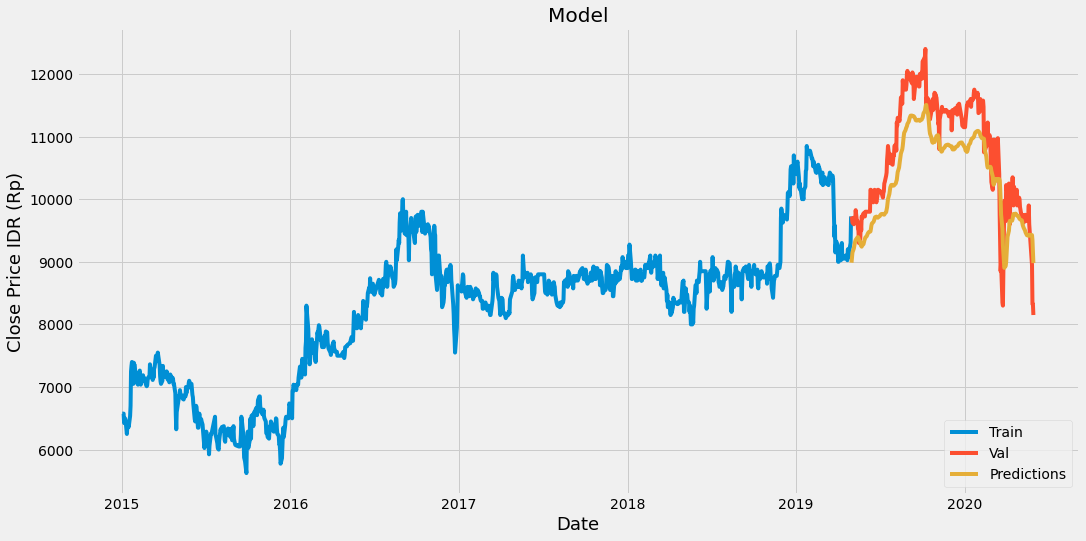

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid & predicted prices
valid

,Close,Predictions
Date,,
2019-05-01,9725.0,8985.292969
2019-05-02,9700.0,9069.759766
2019-05-03,9625.0,9149.889648
2019-05-06,9600.0,9211.465820
2019-05-07,9700.0,9254.651367
...,...,...
2020-05-20,9600.0,9432.304688
2020-05-26,8950.0,9427.069336
2020-05-27,8325.0,9345.831055


In [26]:
#Get the quote
icbp_quote = web.DataReader('ICBP.JK', data_source='yahoo', start='2015-01-01', end='2020-05-28')
#create new df
new_df = icbp_quote.filter(['Close'])
#get the last 60 days closing price & convert df to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#convert X_test to np array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[8775.092]]


In [27]:
#Get the quote
icbp_quote2 = web.DataReader('ICBP.JK', data_source='yahoo', start='2020-05-29', end='2020-05-29')
print(bbca_quote2['Close'])

Date
2020-05-29    8150
2020-05-29    8150
Name: Close, dtype: int64
